In [1]:
# from INS_mod import *
from INS import INS
from Init_det_glrt import Init_det_glrt
from func_loaddataset import func_loaddataset
from utils import *

In [2]:
u = func_loaddataset('./data_inert.txt')

In [3]:
simdata = Init_det_glrt()
# Variables for calculating the performance
D = len(simdata['data_sets'])
Jadapt = 0
Jadapt_all = np.zeros((D, 3))
gamma_vec = np.logspace(4, 6, 20)
M = len(gamma_vec)
ctr = 1
Niter = M
Jfixed = np.zeros(M)
Jfixed_all = np.zeros((M, D, 3))

ins = INS(simdata)

In [4]:
zupt , logL = ins.detector_adaptive(u)
x_h, _ = ins.baseline(u, zupt, logL, True)

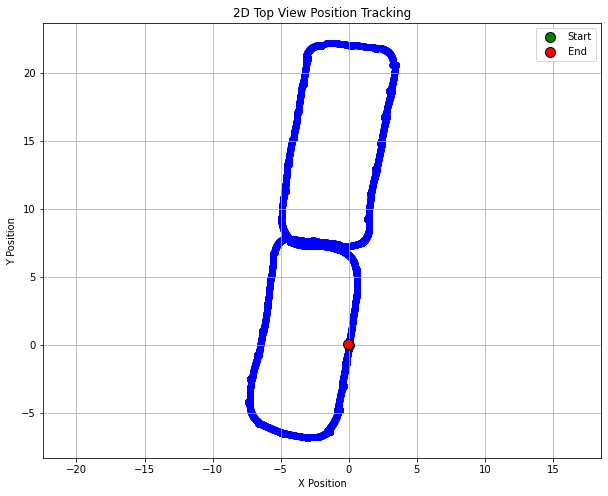

In [5]:
plot_position_tracking(x_h)

In [8]:
n = 1000
num_batches = len(u[0]) // n
state_position = []
xhs = []
init_P = None
init_quat = None
init_position = None
position = np.zeros((3,1))
state_vector = np.zeros((9, 1)) 


for i in range(num_batches+1):
    # print(i)
    ui = u[:, :(i+1)*n]
    zupt , logL = ins.detector_adaptive(ui)
    x_h, _ = ins.baseline(ui, zupt, logL, True) # 9, N
    # x, y, z = x_h[0:3, -1]
    # position[0] += x
    # position[1] += y
    # position[2] += z
    # state_position.append(position.ravel().tolist())
    # init_position = x_h[0:9, -1]
    # init_P = P
    # init_quat = quat
    # for k in range(len(x_h[0])):
    #     xhs.append(list(x_h[:,k]))

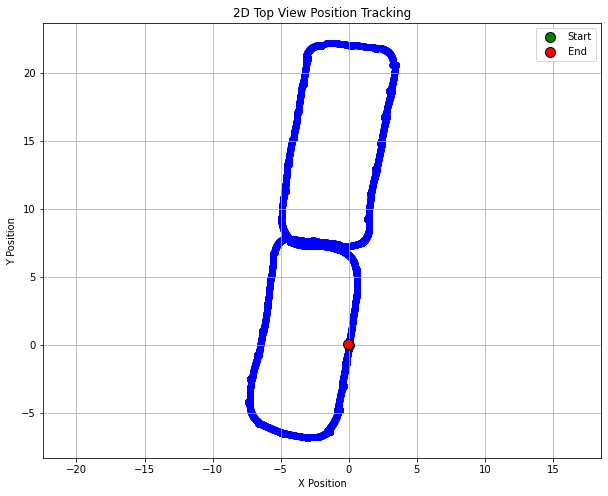

In [10]:
plot_position_tracking(x_h)